In [2]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")

In [3]:
df

,Date,Year,Month,Price,Inflation,unemployment_rate,mortgage_rate,HPSI,lumber,RDPI,new_invent,SP500
0,2012-01-01,2012,Jan,221700,2.9,8.3,3.920,66.2,NaN,39253.0,NaN,NaN
1,2012-02-01,2012,Feb,239900,2.9,8.3,3.890,66.3,NaN,39466.0,NaN,NaN
2,2012-03-01,2012,Mar,239800,2.7,8.2,3.950,66.2,260.483,39590.0,NaN,NaN
3,2012-04-01,2012,Apr,236400,2.3,8.2,3.910,68.2,268.471,39744.0,NaN,NaN
4,2012-05-01,2012,May,239200,1.7,8.2,3.800,69.3,289.473,39731.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
120,2022-01,2022,2022-01,430500,7.5,4.0,3.445,71.8,1145.210,45755.0,492622.0,4573.816
121,2022-02,2022,2022-02,427400,7.9,3.8,3.763,75.3,1203.058,45741.0,554340.0,4435.981
122,2022-03,2022,2022-03,433900,8.5,3.6,4.172,73.2,1233.187,45523.0,752073.0,4391.265
123,2022-04,2022,2022-04,454700,8.3,3.6,4.983,68.5,959.980,45524.0,814590.0,4391.296


In [4]:
# clean the data
df1 = df.dropna()
df1

,Date,Year,Month,Price,Inflation,unemployment_rate,mortgage_rate,HPSI,lumber,RDPI,new_invent,SP500
72,2018-01-01,2018,Jan,329600,2.1,4.0,4.030,89.5,472.048,43332.0,635016.0,2789.800
73,2018-02-01,2018,Feb,327200,2.2,4.1,4.330,85.8,501.616,43434.0,739227.0,2705.160
74,2018-03-01,2018,Mar,335400,2.4,4.0,4.440,88.3,503.267,43563.0,950079.0,2702.770
75,2018-04-01,2018,Apr,314400,2.5,4.0,4.470,91.7,541.471,43639.0,1024371.0,2653.630
76,2018-05-01,2018,May,316700,2.8,3.8,4.590,92.3,605.114,43751.0,1071917.0,2701.490
77,2018-06-01,2018,Jun,310500,2.9,4.0,4.570,90.7,566.643,43859.0,1041346.0,2754.350
78,2018-07-01,2018,Jul,327500,2.9,3.8,4.530,86.5,518.052,43991.0,961118.0,2793.640
79,2018-08-01,2018,Aug,321400,2.7,3.8,4.550,88.0,439.357,44097.0,911368.0,2857.820
80,2018-09-01,2018,Sep,328300,2.3,3.7,4.630,87.7,390.542,44040.0,770408.0,2901.500
81,2018-10-01,2018,Oct,328300,2.5,3.8,4.830,85.7,325.494,44106.0,781999.0,2785.460


In [25]:
import copy
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

new_df = copy.deepcopy(df1)
new_df[['Price', 'Inflation', 'unemployment_rate','mortgage_rate', 'HPSI', 'lumber', 'RDPI', 'new_invent', 'SP500']] = mean_norm(df1[['Price', 'Inflation', 'unemployment_rate','mortgage_rate', 'HPSI', 'lumber', 'RDPI', 'new_invent', 'SP500']])
new_df

,Date,Year,Month,Price,Inflation,unemployment_rate,mortgage_rate,HPSI,lumber,RDPI,new_invent,SP500
72,2018-01-01,2018,Jan,-0.493619,-0.402971,-0.462302,0.517376,0.885759,-0.439459,-1.063938,-0.879893,-0.850065
73,2018-02-01,2018,Feb,-0.551544,-0.356917,-0.421694,0.949561,0.422409,-0.339421,-1.022987,-0.301945,-0.972994
74,2018-03-01,2018,Mar,-0.353632,-0.264810,-0.462302,1.108029,0.735483,-0.333835,-0.971197,0.867428,-0.976465
75,2018-04-01,2018,Apr,-0.860479,-0.218756,-0.462302,1.151248,1.161264,-0.204579,-0.940684,1.279447,-1.047835
76,2018-05-01,2018,May,-0.804967,-0.080594,-0.543517,1.324122,1.236401,0.010746,-0.895718,1.543134,-0.978324
77,2018-06-01,2018,Jun,-0.954608,-0.034540,-0.462302,1.295309,1.036034,-0.119414,-0.852358,1.373589,-0.901552
78,2018-07-01,2018,Jul,-0.544303,-0.034540,-0.543517,1.237685,0.510070,-0.283813,-0.799363,0.928649,-0.844488
79,2018-08-01,2018,Aug,-0.691530,-0.126648,-0.543517,1.266497,0.697914,-0.550064,-0.756806,0.652739,-0.751274
80,2018-09-01,2018,Sep,-0.524995,-0.310863,-0.584124,1.381747,0.660345,-0.715221,-0.779690,-0.129017,-0.687834
81,2018-10-01,2018,Oct,-0.524995,-0.218756,-0.543517,1.669870,0.409886,-0.935299,-0.753193,-0.064734,-0.856368


<AxesSubplot:xlabel='Year', ylabel='Price'>

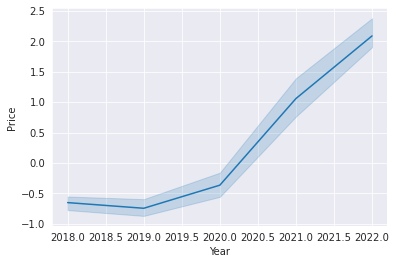

In [26]:
sns.lineplot(x = 'Year', y = 'Price',data = new_df)
# lineplot showing price trend

In [47]:
df1.rename(columns = {'mortgage_rate ':'mortgage_rate', 'HPSI ':'HPSI'}, inplace = True)

housing_model1 = ols("""Price ~ Inflation
                                            + unemployment_rate
                                            + mortgage_rate 
                                            + HPSI 
                                            + lumber 
                                            + RDPI
                                            + new_invent
                                            + SP500""",data= new_df).fit()

housing_model1_summary = housing_model1.summary()
print(housing_model1_summary)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     113.9
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           2.15e-26
Time:                        14:05:43   Log-Likelihood:                 7.3191
No. Observations:                  52   AIC:                             3.362
Df Residuals:                      43   BIC:                             20.92
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.851e-16      0.03

/root/miniconda3/envs/myconda/lib/python3.7/site-packages/pandas/core/frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


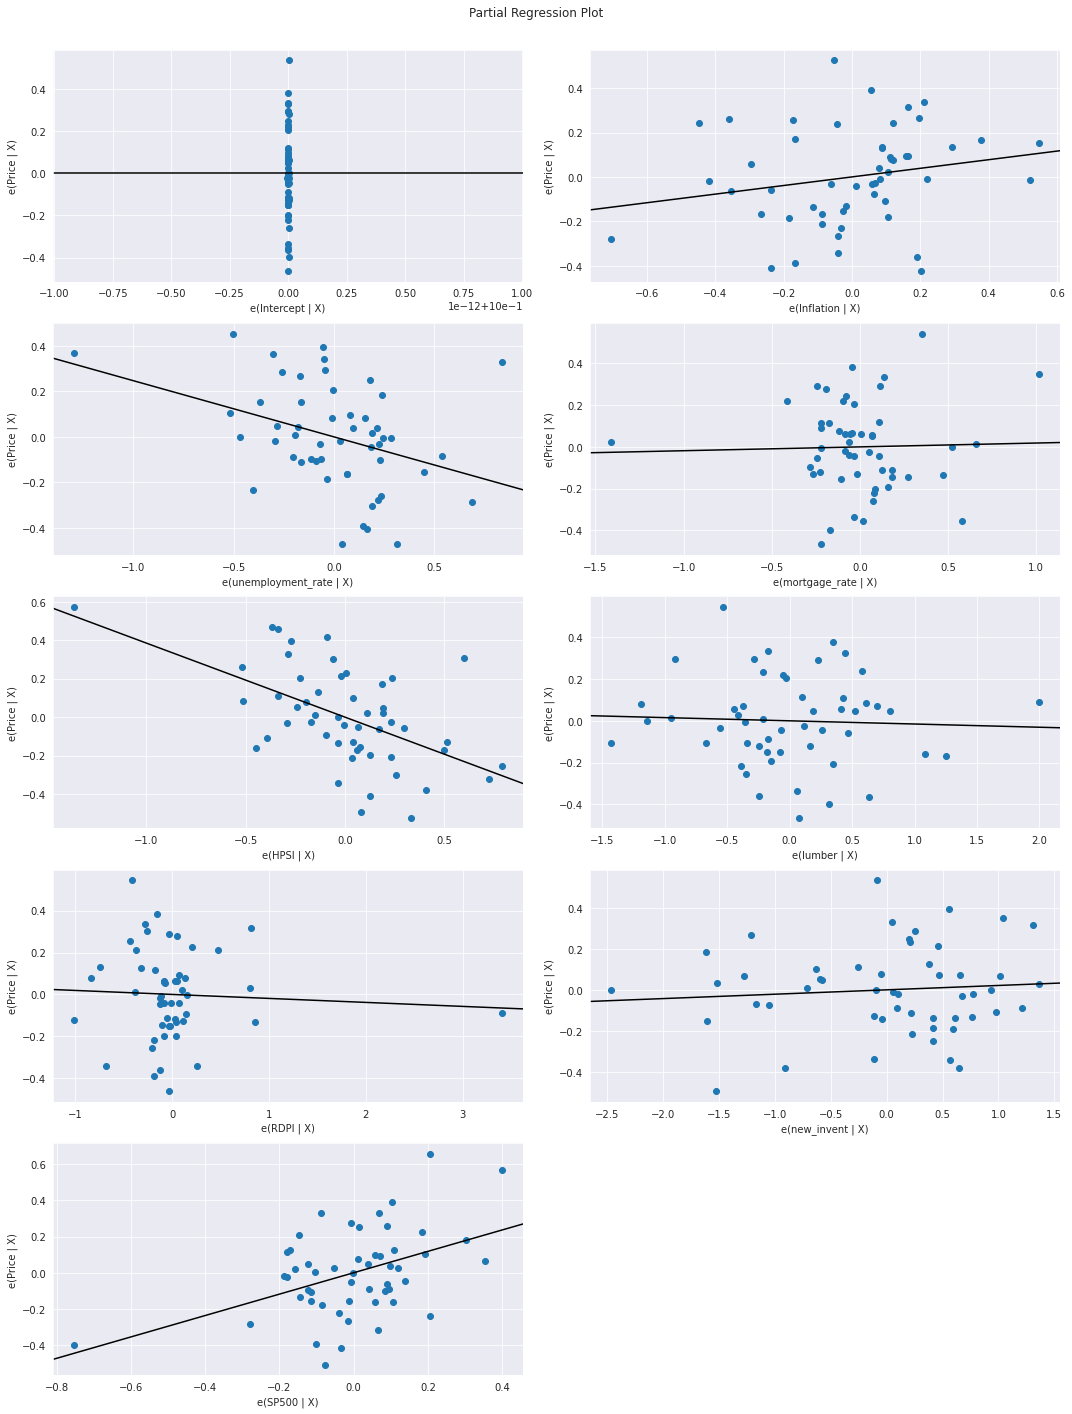

In [48]:
# this produces our nine partial regression plots
fig = plt.figure(figsize=(15,20))
fig = sm.graphics.plot_partregress_grid(housing_model1, fig=fig)

elastic model

In [44]:
housing_model_elastic = ols("""Price ~ Inflation
                                            + unemployment_rate
                                            + mortgage_rate 
                                            + HPSI 
                                            + lumber 
                                            + RDPI
                                            + new_invent
                                            + SP500""",data= new_df)
elastic_resuit=housing_model_elastic.fit_regularized(method='elastic_net', alpha=0.2, L1_wt=0.2)


In [45]:
elastic_resuit.params

Intercept            0.000000
Inflation            0.365266
unemployment_rate    0.000000
mortgage_rate        0.000000
HPSI                -0.149930
lumber               0.047137
RDPI                 0.000000
new_invent          -0.010996
SP500                0.410518
dtype: float64

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


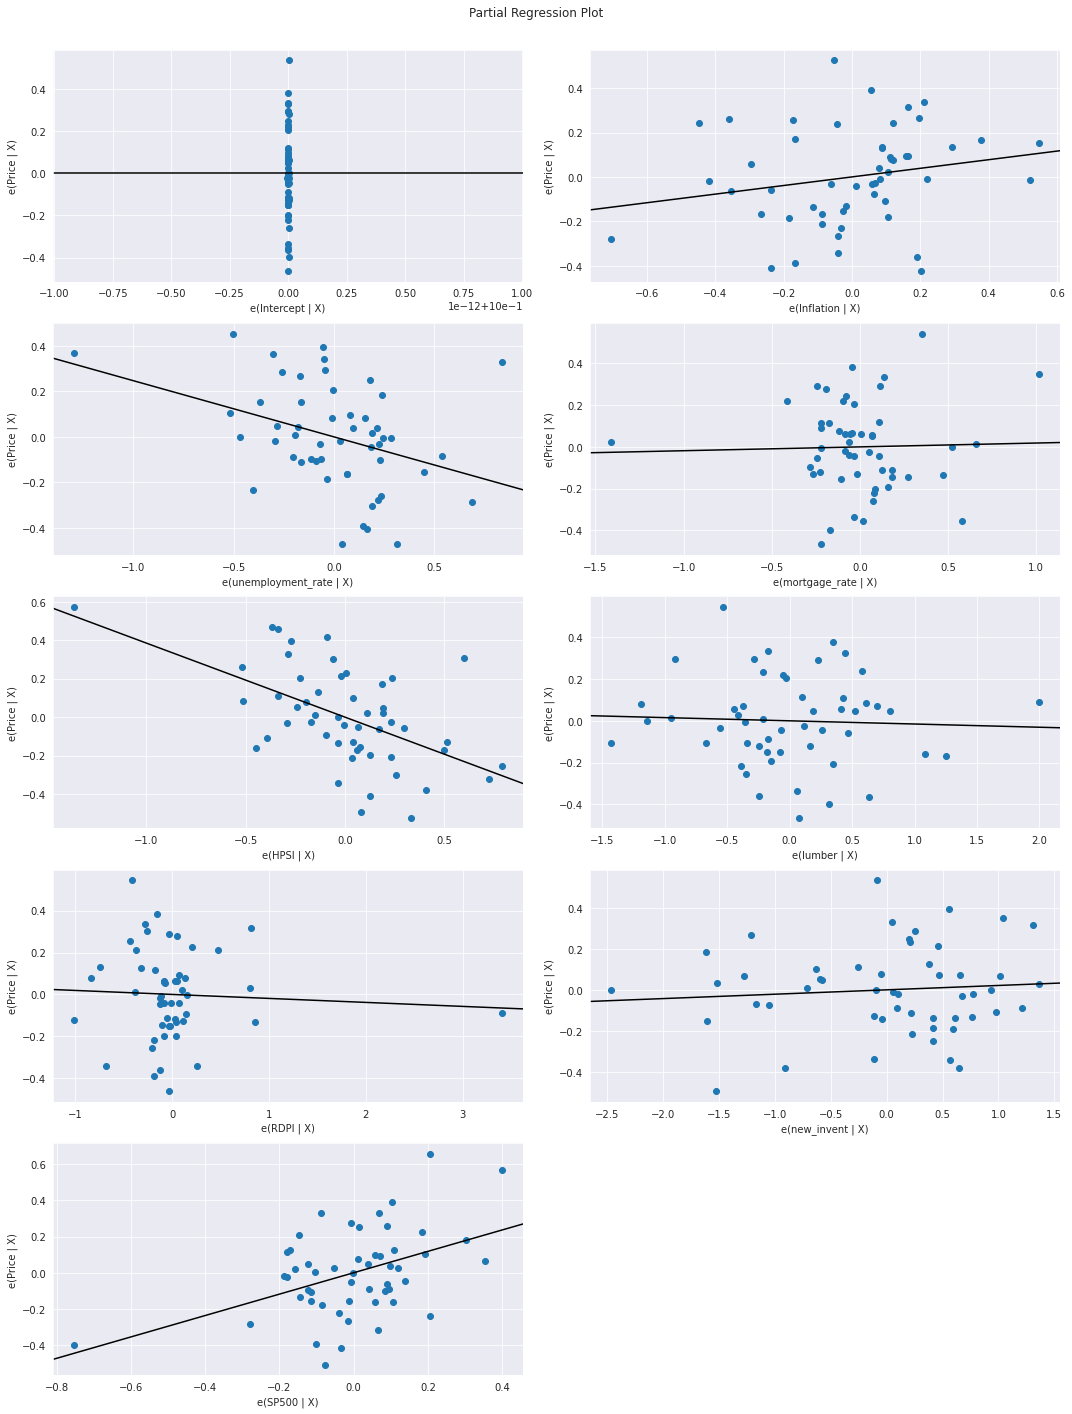

In [46]:
# this produces our nine partial regression plots
fig = plt.figure(figsize=(15,20))
fig = sm.graphics.plot_partregress_grid(elastic_resuit, fig=fig)

ridge regression